In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as ts
import seaborn as sns
import matplotlib.pyplot as plt
import keras as km
from keras.layers import Dense , Flatten , Conv2D
from keras.models import  Sequential

In [3]:
x_train = pd.read_csv("input.csv")

In [4]:
x_train.shape

(1999, 30000)

In [5]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Columns: 30000 entries, 3.700000000000000000e+01 to 2.900000000000000000e+01.298
dtypes: float64(30000)
memory usage: 457.5 MB


In [6]:
x_test = pd.read_csv("input_test.csv")
y_train = pd.read_csv("labels.csv")
y_test = pd.read_csv("labels_test.csv")

In [7]:
y_train.shape

(1999, 1)

In [8]:
y_train.value_counts()

0
1    1000
0     999
dtype: int64

In [9]:
x_train.shape[0]

1999

In [10]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [11]:
x_train = x_train.reshape(x_train.shape[0] , 100 , 100 , 3)
x_test = x_test.reshape(x_test.shape[0] , 100 , 100 , 3)

In [12]:
x_train/=255
x_test/=255

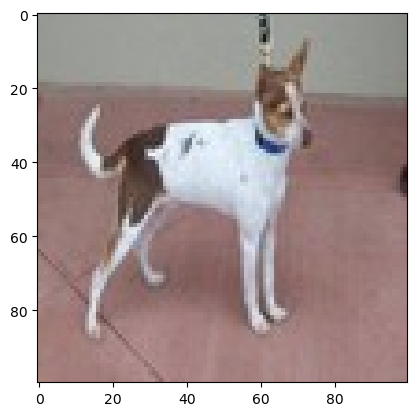

In [13]:
plt.imshow(x_train[22])
plt.show()

In [14]:
y_train = ts.keras.utils.to_categorical(y_train , 2)
y_test = ts.keras.utils.to_categorical(y_test , 2)

In [15]:
sq = Sequential()

In [16]:
sq.add(Conv2D(filters = 64 , kernel_size = (3,3) , activation = "relu" , input_shape = (100,100,3)))
sq.add(Conv2D(filters = 32 , kernel_size = (3,3) , activation = "relu"))
sq.add(Conv2D(filters = 32 , kernel_size = (3,3) , activation = "relu"))
sq.add(Flatten())

In [17]:
sq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 282752)            0         
                                                                 
Total params: 29504 (115.25 KB)
Trainable params: 29504 (115.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
sq.add(Dense(units = 256 , activation = "relu"))
sq.add(Dense(128 , activation = "relu" ))
sq.add(Dense(64 , activation = "relu" ))
sq.add(Dense(32 , activation = "relu" ))
sq.add(Dense(2 , activation = "sigmoid" ))

In [19]:
sq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 282752)            0         
                                                                 
 dense (Dense)               (None, 256)               72384768  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [20]:
sq.compile(optimizer = "adam" , loss = ts.keras.losses.categorical_crossentropy , metrics = ["accuracy"])

In [21]:
sq.fit(x_train , y_train,
      batch_size = 50,
       epochs = 10)

Epoch 1/10


40/40 [==============================] - 33s 792ms/step - loss: 1.1314 - accuracy: 0.5328
Epoch 2/10
40/40 [==============================] - 31s 787ms/step - loss: 0.6788 - accuracy: 0.5603
Epoch 3/10
40/40 [==============================] - 31s 786ms/step - loss: 0.6559 - accuracy: 0.6273
Epoch 4/10
40/40 [==============================] - 31s 776ms/step - loss: 0.5635 - accuracy: 0.7099
Epoch 5/10
40/40 [==============================] - 31s 783ms/step - loss: 0.3887 - accuracy: 0.8364
Epoch 6/10
40/40 [==============================] - 31s 787ms/step - loss: 0.1688 - accuracy: 0.9375
Epoch 7/10
40/40 [==============================] - 31s 781ms/step - loss: 0.0354 - accuracy: 0.9895
Epoch 8/10
40/40 [==============================] - 31s 784ms/step - loss: 0.0075 - accuracy: 0.9995
Epoch 9/10
40/40 [==============================] - 31s 778ms/step - loss: 0.0074 - accuracy: 0.9980
Epoch 10/10
40/40 [==============================] - 31s 783ms/step - loss: 0.1387 - accu